### Основые математического моделирования. Отчет №1, вариант 27.


Выполнил: Захаров Валерий Сергеевич студент 324 группы
\ Преподаватель: Белов Александр Александрович

##### 1. Постановка задачи

Используя схему бегущего счета и итерационные методы, решить задачу для квазилинейного уравнением переноса:

$$\left\{\begin{aligned}
\frac{\partial u}{\partial t} + \frac{1}{1+u}\frac{\partial u}{\partial x}  = 0,\ ~ 0 < x \leq 1\\
u(x,0)= \cos \frac{\pi x}{2}\\
u(0,t) = e^{-t} \\ 
\end{aligned}\\
\right. $$

##### 2. Исследование характеристик
Выясним, будет ли решение иметь разрыв, для этого составим уравнения характеристик и узнаем, будут ли они иметь точки пересечения. Уравнение характеристик будет иметь вид:
$~~dt=(1+u_0(x_0, t_o)) dx$

Интегрируя его получим: $t=t_0-(1+u_0(x_0, t_o))(x-x_0)$

С учетом начального и граничного условий мы получили два семейства кривых:

$~~t_0=0: t=- (1+\cos \frac{\pi x_o}{2})(x-x_0)$

$~~x_0=0: t=-(1+e^{-t_o})x+t_0$

Имеем, кривые, которые не пересекаются друг с дргуом при любых значениях x, для подтверждения этого построим соответствующие кривые для нескольких значений x_0 и t_0 .

Импорт необходимых библиотек

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import *

from mpl_toolkits.mplot3d import axes3d

Создание функций, задающей характеристики для набора чисел $x_0$ и $t_0$ соответственно

In [2]:
def char1(x):
    return [-(x - C)*(1+cos(pi*C/2)) for C in np.arange(0,1.1,0.1)]

def char2(x):
    return [-x*(1+exp(-C)) + C for C in np.arange(0,1.1,0.1)]

Создание массива для значений $x$ в промежутке $(0, 1]$ и соответствущих массивов для фунций характеристик

In [3]:
x_list = np.arange(0,1.1,0.1)
char1_list = [char1(x) for x in x_list]
char2_list = [char2(x) for x in x_list]

Построение графиков характеристик

<IPython.core.display.Javascript object>


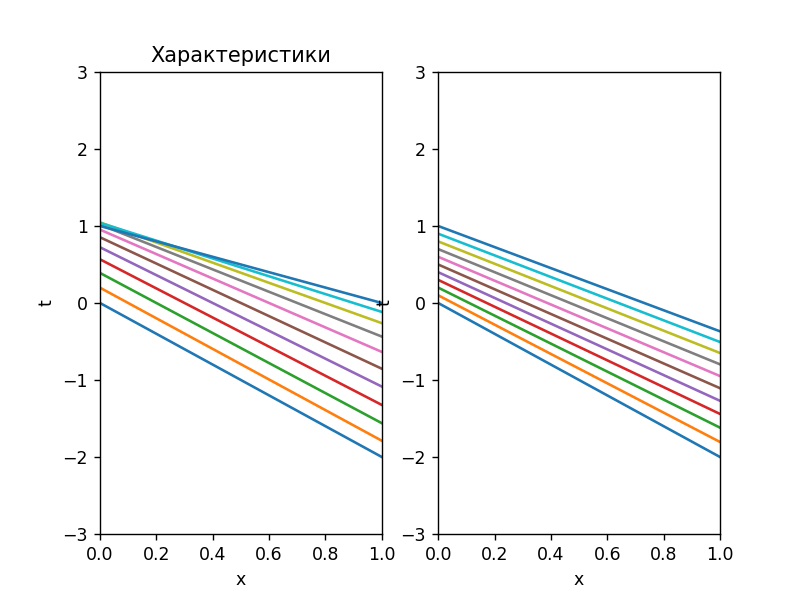

In [13]:
%matplotlib notebook

plt.subplot(1, 2, 1)
plt.ylim(-3,3)
plt.xlim(0,1)
plt.plot(x_list, char1_list) 
plt.title('Характеристики')
plt.ylabel('t')
plt.xlabel('x')
plt.subplot(1, 2, 2)
plt.ylim(-3,3)
plt.xlim(0,1)
plt.plot(x_list, char2_list) 
plt.ylabel('t')
plt.xlabel('x')


plt.show()

Из построения явно видно, что в заданном полуинтервале характеристики не пересекаются. Значит, нет опрокидования волны, и решение в заданной области определено однозначно.

##### 2. Исследование на устойчивость

1. Критерий Неймана

Выберем произвольную точку $(x_0,t_0)$ исследуемой обасти $\Omega$ и обозначим зафиксированный коэффициент $\frac{1}{1+u(x_o~,t_o)}~$ за $A$, тогда получим для разностной схемы:

$$\begin{aligned}
\frac{u^{m+1}_{n+1}-u^{m}_{n+1}+u^{m+1}_{n}-u^{m}_{n}}{h_t}+A\frac{u^{m+1}_{n+1}-u^{m+1}_{n}+u^{m}_{n+1}-u^{m}_{n}}{h_x}=0\end{aligned}$$

Будем искать решение данного уравнения в виде
$u^m_{n}=\lambda^m e^{i\alpha n}$. Подставив замену в уравнение,
получим: 

$$\begin{aligned}
\lambda e^{i\alpha}-e^{i\alpha}+\lambda -1+\frac{Ah_t}{h_x}(\lambda e^{i\alpha}- \lambda + e^{i\alpha}-1)=0\end{aligned}$$


Тогда для $\lambda$ получим: 

$$\begin{aligned}
\lambda = \frac{e^{i\alpha}+1+\frac{Ah_t}{h_x}(1-e^{i\alpha})}{e^{i\alpha}+1+\frac{Ah_t}{h_x}(e^{i\alpha}-1)}\end{aligned}$$

$$\begin{aligned}
|\lambda | = 1\end{aligned}$$

Из данного соотношения получаем, что
условие $|\lambda(\alpha)|\leq1$ выполняется для любых соотношений шагов по x и по t, а значит, критерий Неймана выполнен.

2. Критерий Куранта

Перепишем исследуемую разностную схему, поставив для нее задачу в виде:

$$\begin{aligned}
\begin{cases}
\frac{u^{m+1}_{n+1}~~-~u^{m}_{n+1}~~+~u^{m+1}_{n}~~-~u^{m}_{n}}{h_t}~~+~A\frac{u^{m+1}_{n+1}~~-~u^{m+1}_{n}~~+~u^{m}_{n+1}~~-~u^{m}_{n}}{h_x}=\epsilon ^{m}_n\\
u^{0}_n=\mu_n\\
u^{m}_0=\psi^{m}
\end{cases}\end{aligned}$$ 

Преобразуем уравнение к виду:

$$\begin{aligned}
u^{m+1}_{n+1}(1+\frac{Ah_t}{h_x})+u^{m+1}_n(1-\frac{Ah_t}{h_x})=u^{m}_{n+1}(1-\frac{Ah_t}{h_x})+u^{m}_n(1+\frac{Ah_t}{h_x})+h_t \epsilon ^{m}_n\end{aligned},$$ $\epsilon ^{m}_n$ - возмущение исходной схемы. 

Попробуем оценить данное соотношение по равномерной норме: 

$$\begin{aligned}
\|u^{m+1}\|(1+\frac{Ah_t}{h_x})+\|A^{m+1}\|(1-\frac{Ah_t}{h_x}) \leq 
\|u^{m}\|(1-\frac{Ah_t}{h_x})+\|A^{m}\|(1+\frac{Ah_t}{h_x})+h_t \|\epsilon ^{m}\| \notag\end{aligned}$$

$$\begin{aligned}
2\|u^{m+1}\|\leq 2\|u^{m}\| + h_t\|\epsilon\|\end{aligned}$$ 

Тогда по
индукции можно получить: $$\begin{aligned}
\| u^m\| \leq \|\psi\| + \frac{mh_t}{2}\|\epsilon\|\end{aligned}$$

Переобозначая: 

$$\begin{aligned}
\| u^m\| \leq \ M|\psi\| + N\|\epsilon\|\end{aligned}$$ 

$M = const$ и $N = const$ не зависят от шагов сетки. 

Таким образом получаем, что и критерий Куранта
выполнен для рассматриваемой схемы для любых соотношений шагов по
$t$ и по $x$.

##### 3. Определение порядка апроксимации

Для вычисления порядка апроксимации разложим значения
функции $u$ в узлах сетки в ряд до члена третьего порядка включительно в
точке $(x_n+\frac{h_x}{2};t_m+\frac{h_t}{2})$: 

$$\begin{aligned}
u^{m+1} = u^{m+0.5}+\frac{h_t}{2}u'~^{m+0.5} + \frac{1}{2}\frac{h^{2}_t}{4} u''~^{m+0.5}+\frac{1}{6}\frac{h^{3}_t}{8}u'''~^{m+0.5} + O(h^{4}_t)\\
u^{m} = u^{m+0.5}-\frac{h_t}{2}г'~^{m+0.5}+\frac{1}{2}\frac{h^{2}_t}{4} u''~^{m+0.5}-\frac{1}{6}\frac{h^{3}_t}{8}u'''~^{m+0.5} + O(h^{4}_t)\\
u_{n+1} = u_{n+0.5}+\frac{h_x}{2}u'_{n+0.5}+\frac{1}{2}\frac{h^{2}_x}{4} u''_{n+0.5}+\frac{1}{6}\frac{h^{3}_x}{8}u'''_{n+0.5} + O(h^{4}_x)\\
u_{n} = u_{n+0.5}-\frac{h_x}{2}u'_{n+0.5}+\frac{1}{2}\frac{h^{2}_x}{4} u''_{n+0.5}-\frac{1}{6}\frac{h^{3}_x}{8}u'''_{n+0.5} + O(h^{4}_x)
\end{aligned}$$

В итоге получим: 

$$\begin{aligned}
\frac{u^{m+1}_{n+1}-u^{m}_{n+1}+u^{m+1}_n-u^{m}_n}{h_t} +A\frac{u^{m+1}_{n+1}-u^{m+1}_{n}+u^{m}_{n+1}-u^{m}_{n}}{h_x} -\frac{\partial u}{\partial t} -A\frac{\partial u}{\partial x}=O(h^{2}_t + h^{2}_x) \end{aligned}$$


##### 4. Исследование разностной схемы

1. Сетка

Введем в области $\Omega=\{(x,t):0 < x\leq 1,~~0<t<T\} $ сетку с шагом $h_x$ по $x$ и шагом $h_t$ по $t$:
\begin{eqnarray}
\omega_{h_x, ~ h_t}=\begin{cases}
x_n=n\cdot h_x, ~~h_x=\frac{1}{N-1}, ~~n=\overline{0, N-1}\\
t_m=m\cdot h_t, ~~h_t=\frac{1}{M-1}, ~~m=\overline{0, M-1}
\end{cases}
\end{eqnarray}

На $\omega_{h_x, ~ h_t}$ будем рассматривать сеточную функцию $y^m_{n}=u(x_n,t_m)$

2. Шаблон

Для рассматриваемой задачи будем использовать четырехточечный шаблон, который безусловно устойчив и аппроксимирует задачу как $ O({h_x}^2 + {h_t}^2)$ в центральной точке $(x_n+0.5h_x, t_m+0.5h_t)$

Таким образом, разностная схема задачи имеет вид:

$$\frac{y^{m+1}_n - y^m_{n} + y^{m+1}_{n+1} - y^m_{n+1}}{2h_t} + \frac{\ln(y^{m+1}_{n}+1) - \ln((y^{m}_{n}+1) + \ln(y^{m+1}_{n+1}+1) - \ln(y^{m}_{n+1}+1)}{2h_x}= 0 $$

Также начальное и граничное условия:

$$\left\{\begin{aligned} 
y^0_n= \cos\frac{\pi nh_x}{2}\\
y^{m}_0 = e^{-mh_t}
\end{aligned}\\
\right. $$

3. Cхема бегущего счета

Данную задачу будем решать при помощи схемы бегущего счета. Значение сеточной функции $ y^{m+1}_{n+1} $ неизвестно, но нам известны все значения, соответствующие начальному( $y^0_n$ ) и граничному( $y^{m}_0$ ) условиям. Таким образом, зная значения в трех соседних точках: $y^{0}_0, y^{0}_1, y^{1}_0$, мы можем численно найти значение в четвертой точке $y^{1}_1$. Зная это значение, мы можем найти по трем известным точкам либо $y^{2}_1$, либо $y^{1}_2$. И так далее, заполняя найденными значениями сетку.  

Введем вспомогательную функцию $f$ нуль которой нам необходимо найти, а также её производную $f' = \frac{df}{dv}$

$$\left\{\begin{aligned} 
f(y^{m+1}_{n+1}) = \frac{y^{m+1}_n - y^m_{n} + y^{m+1}_{n+1} - y^m_{n+1}}{2h_t} + \frac{\ln(y^{m+1}_{n}+1) - \ln((y^{m}_{n}+1) + \ln(y^{m+1}_{n+1}+1) - \ln(y^{m}_{n+1}+1)}{2h_x}\\
f'(y^{m+1}_{n+1}) = \frac{1}{2h_t} + \frac{1}{2h_x}\frac{1}{1+u}
\end{aligned}\\
\right. $$

Будем решать задачу итерационным методом Ньютона:

$$ f'({y^{m+1}_{n+1}}^{(s)})~\Delta y^{m+1}_{n+1} = -f({y^{m+1}_{n+1}}^{(s)}) $$ 

т.е. 

$$ {y^{m+1}_{n+1}}^{(s+1)} = {y^{m+1}_{n+1}}^{(s)} - \frac{ f({y^{m+1}_{n+1}}^{(s)}) }  { f'({y^{m+1}_{n+1}}^{(s)}) } $$

До достижения заданной точности $ \epsilon $: $$ | {y^{m+1}_{n+1}}^{(s+1)} - {y^{m+1}_{n+1}}^{(s)} | \leq \epsilon $$

#### Код программы

In [5]:
np.seterr(all='warn')

epsilon = 0.01 # точность в методе Ньютона
N = 100; M = 100
T_begin = 0; T_end = 1
X_begin = 0; X_end = 1

In [6]:
#элементарные шаги
h_x=(X_end - X_begin)/(N-1)
h_t=(T_end - T_begin)/(M-1)

In [7]:
y=np.zeros((M,N)) # сетка

In [8]:
# заполняем сетку начальным и граничным условиями
for n in np.arange(N):
        y[0][n] = (cos(pi * h_x * n /2))

for m in np.arange(M):
        y[m][0] = exp(-h_t * m)

In [9]:
# разностная схема
def f(m1, n1):
    n = n1-1
    m = m1-1
    return (y[m1][n]-y[m][n] + y[m1][n1]-y[m][n1]) / (2*h_t) + (
        log(y[m1][n]+1)-log(y[m][n]+1) + log(y[m1][n1]+1)-log(y[m][n1]+1)) / (2*h_x)

In [10]:
# f'
def df(m1,n1):
    return 0.5/h_t + 0.5/h_x/(y[m1][n1]+1)

In [11]:
# схема Ньютона
for m in np.arange(M)[0:M-1]:
    for n in np.arange(N)[0:N-1]:
        eps = epsilon + 1;
        while eps > epsilon:
            ep = f(m+1, n+1)/df(m+1, n+1)
            y[m+1][n+1] = y[m+1][n+1] - ep
            eps = np.abs(ep)

<IPython.core.display.Javascript object>


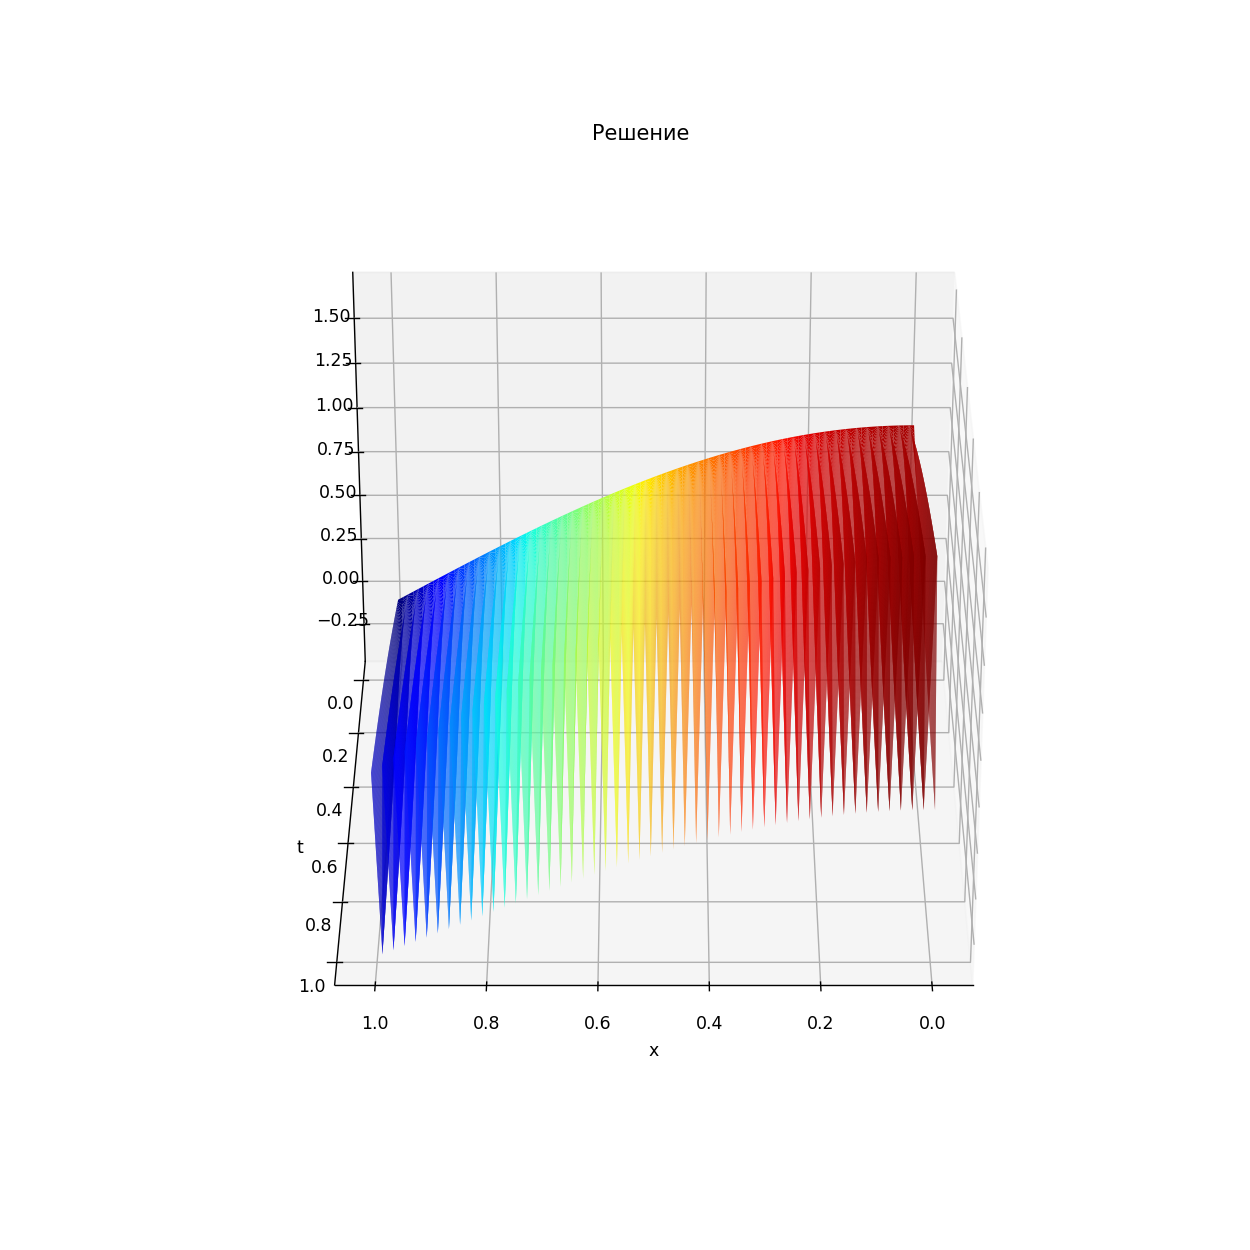

In [12]:
#визуализация
%matplotlib notebook

tm = np.linspace(T_begin,T_end, num=M)
xn = np.linspace(X_begin, X_end, num=N)

X, T = np.meshgrid(xn, tm)

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, T, y, rstride = 1, cstride = 1, cmap = 'jet')
ax.view_init(30, 90)
plt.title('Решение')
plt.xlabel('x')
plt.ylabel('t')
plt.show()